In [ ]:
!wget "http://motioncore-umh.cs.umn.edu/4980/sms_spam_cleaned.csv"

--2023-02-23 01:15:53--  http://motioncore-umh.cs.umn.edu/4980/sms_spam_cleaned.csv
Resolving motioncore-umh.cs.umn.edu (motioncore-umh.cs.umn.edu)... 128.101.106.27
Connecting to motioncore-umh.cs.umn.edu (motioncore-umh.cs.umn.edu)|128.101.106.27|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 445082 (435K) [text/csv]
Saving to: ‘sms_spam_cleaned.csv.2’

sms_spam_cleaned.cs 100%[===================>] 434.65K  --.-KB/s    in 0.09s   

2023-02-23 01:15:53 (4.48 MB/s) - ‘sms_spam_cleaned.csv.2’ saved [445082/445082]



In [ ]:
import nltk.stem
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import os

In [ ]:
df = pd.read_csv("sms_spam_cleaned.csv")
documents= np.array(df['msg'])
labels = np.array(df['type'])

Part 1: Binary Clustering

In [ ]:
#taken from lecture
english_stemmer = nltk.stem.SnowballStemmer('english')
class StemmedTfidfVectorizer(TfidfVectorizer):
   def build_analyzer(self):
     analyzer = super(StemmedTfidfVectorizer, self).build_analyzer()
     return lambda doc: (english_stemmer.stem(w) for w in analyzer(doc))

vectorizer = StemmedTfidfVectorizer(min_df=1, stop_words='english')
X_train = vectorizer.fit_transform(documents)
vec_docs = vectorizer.fit_transform(documents)

In [ ]:
#taken from lecture
num_clusters = 2
km = KMeans(n_clusters=num_clusters, init='random', n_init=10, verbose=1)
km.fit(X_train)

Initialization complete
Iteration 0, inertia 10479.743189419003
Iteration 1, inertia 5244.7322094491965
Iteration 2, inertia 5244.503085852346
Iteration 3, inertia 5244.07609084302
Iteration 4, inertia 5244.017009929298
Iteration 5, inertia 5244.007139205539
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 10275.993391826225
Iteration 1, inertia 5247.015941259824
Iteration 2, inertia 5239.6670661726375
Iteration 3, inertia 5235.922091829114
Iteration 4, inertia 5232.419675518393
Iteration 5, inertia 5228.724060679473
Iteration 6, inertia 5226.236094991462
Iteration 7, inertia 5224.735804079779
Iteration 8, inertia 5223.018263540924
Iteration 9, inertia 5222.0154318802815
Iteration 10, inertia 5221.378382327215
Iteration 11, inertia 5220.773648564272
Iteration 12, inertia 5220.041938830811
Iteration 13, inertia 5219.318782388604
Iteration 14, inertia 5218.276894263901
Iteration 15, inertia 5216.695185970491
Iteration 16, inertia 5215.52855700507

KMeans(init='random', n_clusters=2, verbose=1)

In [ ]:
#taken from lecture
def accuracy(pred, actual):
  count = 0
  for i in range(len(pred)):
    if pred[i] == actual[i]:
      count += 1
  return count / len(actual)

In [ ]:
def precision(pred, actual):
  TP_count = 0
  FP_count = 0
  for i in range(len(pred)):
    if pred[i] == actual[i] and pred[i] == 'spam':
      TP_count += 1
    elif pred[i]!= actual[i] and pred[i] == 'spam':
      FP_count += 1

  if TP_count + FP_count == 0:
    return 0
  return TP_count / (TP_count + FP_count)

In [ ]:
def recall(pred, actual):
  TP_count = 0
  FN_count = 0
  for i in range(len(pred)):
    if pred[i] == actual[i] and pred[i] == 'spam':
      TP_count += 1
    elif pred[i] != actual[i] and pred[i] == 'ham':
      FN_count += 1

  if TP_count + FN_count == 0:
    return 0
  return TP_count / (TP_count + FN_count)

In [ ]:
def f1_score(precision, recall):
  if(precision + recall) == 0:
    return 0
  return 2 * ((precision * recall) / (precision + recall))

In [ ]:
pred = ['ham']*X_train.shape[0]
actual = df['type'].to_numpy()


In [ ]:
cluster_0_spam_count = 0
cluster_1_spam_count = 0
count_0 = 0
count_1 = 0
for i in range(len(km.labels_)):
  if km.labels_[i] == 0:
    count_0 += 1
    if actual[i] == 'spam':
      cluster_0_spam_count += 1
  else:
    count_1 +=1
    if actual[i] == 'spam':
      cluster_1_spam_count += 1
spam = 0 #cluster 0
print(count_1)
print(cluster_1_spam_count/count_1)
print(cluster_0_spam_count/count_0)
if cluster_1_spam_count/count_1 > cluster_0_spam_count/count_0:
  spam = 1 #cluster 1

251
0.00796812749003984
0.13515115589804386


In [ ]:
for i in range(len(km.labels_)):
  if km.labels_[i] == 0 and spam == 0:
    pred[i] = 'spam'
  elif km.labels_[i] == 1 and spam == 1:
    pred[i] ='spam'

In [ ]:
#spam is my positive class
pred = np.array(pred)
accuracy_km = accuracy(pred, actual)
precision_km = precision(pred, actual)
recall_km = recall(pred, actual)
f1_score_km = f1_score(precision_km, recall_km)
print("Accuracy: " + str(accuracy_km))
print("Precision: " + str(precision_km))
print("Recall: " + str(recall_km))
print("F1 Score: " + str(f1_score_km))

Accuracy: 0.17564006024096385
Precision: 0.13515115589804386
Recall: 0.9970845481049563
F1 Score: 0.23803723681921


In [ ]:
import collections
counter = collections.Counter(pred)
print(counter)

Counter({'spam': 5061, 'ham': 251})


In [ ]:
import collections
counter = collections.Counter(actual)
print(counter)

Counter({'ham': 4626, 'spam': 686})


Extra Credit: Second Unsupervised Method

In [ ]:
from sklearn.decomposition import PCA
doc_features = X_train.toarray()
pca = PCA(n_components=3)
pc = pca.fit_transform(doc_features)
pred = []
for test_feature in pc:
  dist = [np.linalg.norm((test_feature - train_feature)) for train_feature in pc]
  best_idx = np.argmin(dist)
  pred += [labels[best_idx]]

print(pred)
print(labels)
acc = accuracy(pred, labels)
pre = precision(pred, labels)
rec = recall(pred, labels)
f1= f1_score(pre, rec)
print("Accuracy: ",acc,"\n")
print("Precision: ",pre,"\n")
print("Recall: ",rec,"\n")
print("F1-Score: ",f1,"\n")

['ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ha

Part 2: Clustering Quality

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn

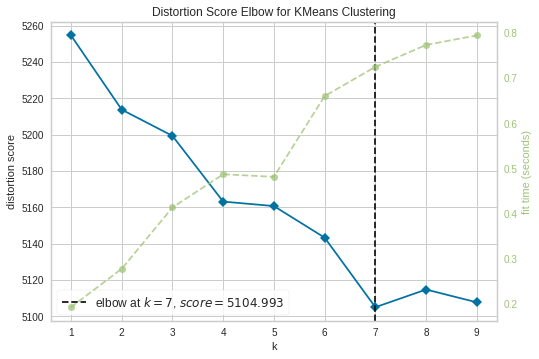

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
km = KMeans(init='random', n_init=10)
visualizer = KElbowVisualizer(km, k=(1,10))
visualizer.fit(X_train)
visualizer.show()

In [ ]:
#best k = 6
num_clusters = 6
km = KMeans(n_clusters= num_clusters, init='random', n_init=10)
km.fit(X_train)

KMeans(init='random', n_clusters=6)

In [ ]:
spam_counts = [0, 0, 0, 0, 0, 0]
not_spam_counts = [0, 0, 0, 0, 0, 0]
for i in range(len(km.labels_)):
  if actual[i] == 'spam':
    spam_counts[km.labels_[i]] += 1
  else:
    not_spam_counts[km.labels_[i]] += 1

for i in range(6):
  percentage = (spam_counts[i] / (spam_counts[i] + not_spam_counts[i])) * 100
  print("Cluster " + str(i) + " is " + str(percentage) + "% spam")

#cluster 0,1 is mostly not spam
#cluster 3 is mostly spam


Cluster 0 is 13.78076062639821% spam
Cluster 1 is 20.923076923076923% spam
Cluster 2 is 0.0% spam
Cluster 3 is 0.0% spam
Cluster 4 is 0.0% spam
Cluster 5 is 0.7142857142857143% spam


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

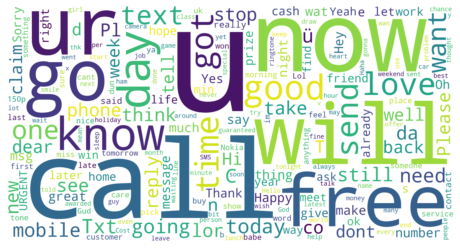

cluster size:  4470
-ham
-spam
-ham
-ham
-spam
-ham
-ham
-spam
-spam
-ham


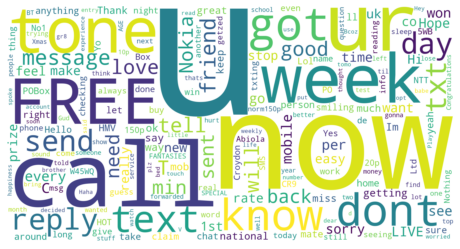

cluster size:  325
-ham
-ham
-ham
-ham
-ham
-ham
-ham
-ham
-ham
-ham


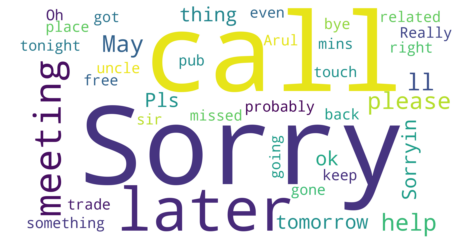

cluster size:  58
-ham
-ham
-ham
-ham
-ham
-ham
-ham
-ham
-ham
-ham


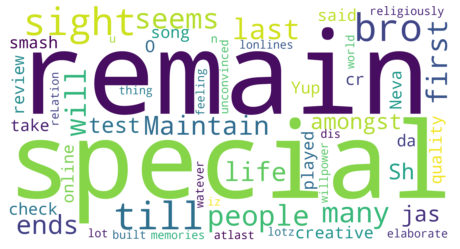

cluster size:  9
-ham
-ham
-ham
-ham
-ham
-ham
-ham
-ham
-ham


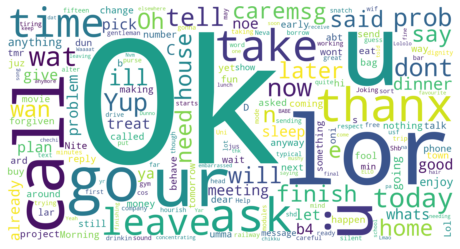

cluster size:  170
-ham
-ham
-ham
-ham
-ham
-ham
-ham
-ham
-ham
-ham


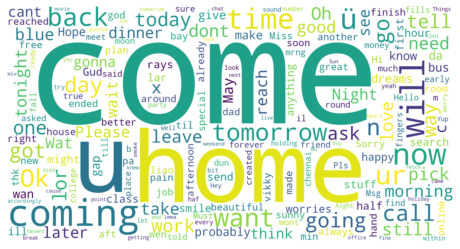

cluster size:  280
-ham
-spam
-ham
-ham
-ham
-ham
-ham
-ham
-ham
-ham


In [ ]:
#taken from lecture
for cluster_id in range(0,num_clusters):
  matching_indices = (km.labels_== cluster_id)
  all_text = " ".join(txt for txt in documents[matching_indices.nonzero()[0]])
  word_cloud1 = WordCloud(collocations = False, background_color = 'white',
                          width = 2048, height = 1080).generate(all_text)
  plt.imshow(word_cloud1, interpolation='bilinear')
  plt.axis("off")
  plt.show()
  print("cluster size: ",documents[matching_indices].size)
  print("-"+"\n-".join(txt for txt in actual[matching_indices][0:10]))

In [ ]:
for cluster_id in range(0,num_clusters):
  print(cluster_id)
  matching_indices = (km.labels_== cluster_id)
  count = 0
  for i in range( len(documents[matching_indices.nonzero()[0]])):
    if actual[i] == 'ham':
      print(documents[matching_indices.nonzero()[0][i]])
      count += 1
      if count == 60:
        break

0
Go until jurong point crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
Nah I don't think he goes to usf he lives around here though
FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send £1.50 to rcv
As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune
WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.
SIX chances to win CASH! From 100 to 20000 pounds txt> CSH11 and send to 87575. Cost 150p/day 6days 16+ TsandCs apply Reply HL 4 info
I HAVE A DATE ON SUNDAY WITH WILL!!
Oh k...i'm watching here:)
Fine if

In [ ]:
new_sentence_1 = "are u ok?"
new_sentence_2 = "FREE cash! call or txt 800-444-free now to claim it"
new_sentence_3 = "sorry, cant talk, ill call you later"
new_sentence_4 = "wat job u got?"

vec_1 = vectorizer.transform([new_sentence_1])
vec_2 = vectorizer.transform([new_sentence_2])
vec_3 = vectorizer.transform([new_sentence_3])
vec_4 = vectorizer.transform([new_sentence_4])

cluster_1 = km.predict(vec_1)[0]
print(cluster_1)
cluster_2 = km.predict(vec_2)[0]
print(cluster_2)
cluster_3 = km.predict(vec_3)[0]
print(cluster_3)
cluster_4 = km.predict(vec_4)[0]
print(cluster_4)

4
0
2
0


Part 3: PCA

In [ ]:
#taken from lecture
from sklearn.decomposition import PCA
import plotly.express as px
doc_features = X_train.toarray()
ids = np.arange(0,len(actual))

pca = PCA(n_components=3)
pc = pca.fit_transform(doc_features)

pc_df = pd.DataFrame(data = pc, columns = ['PC1', 'PC2', 'PC3'])
pc_df['Cluster'] = actual
pc_df['ID'] = ids
pc_df

fig = px.scatter_3d(pc_df, x="PC1", y="PC2", z="PC3", color = 'Cluster',hover_data=["ID"])
fig.show()

In [ ]:
print(documents[1555])

Friends that u can stay on fb chat with


In [ ]:
print(documents[4040])

Sez hows u & de arab boy? Hope u r all good give my love 2 evry1 love ya eshxxxxxxxxxxx


In [ ]:
print(documents[2639])

 and  picking them up from various points


In [ ]:
df.shape

(5312, 2)

In [ ]:
import matplotlib.pyplot as plt
above_50 = -1
pca = PCA(n_components=600)
pc = pca.fit_transform(doc_features)
variance = pca.explained_variance_ratio_
sum_variance = []
sum = 0
for i in range(len(variance)):
  sum += variance[i]
  if sum > 0.5 and above_50 == -1:
    above_50 = i + 1
  sum_variance.append(sum)
print(variance)
print(sum_variance)

[0.01046539 0.0097249  0.00645886 0.00518923 0.00508351 0.0048677
 0.00455746 0.00442209 0.00419101 0.00407675 0.00396945 0.00386069
 0.00379207 0.00370055 0.00368192 0.00364618 0.00359485 0.00350062
 0.00345486 0.00338656 0.00334358 0.0033096  0.00325968 0.00318201
 0.00313539 0.00308504 0.00304649 0.00296533 0.00293137 0.00291779
 0.00288456 0.00283504 0.00277483 0.00272798 0.00269625 0.00267745
 0.00266204 0.00261195 0.00259931 0.0025844  0.00257307 0.00255331
 0.00252073 0.00249314 0.00246514 0.00243287 0.0024052  0.00238887
 0.00235872 0.00233679 0.00232351 0.00231551 0.00230582 0.00224868
 0.00223797 0.00222428 0.00221403 0.00219145 0.00217986 0.00217306
 0.00216125 0.00212713 0.0021088  0.00209784 0.0020894  0.00206213
 0.00203419 0.00202736 0.00200122 0.00198782 0.00197678 0.00196598
 0.00195343 0.00194162 0.00190249 0.0018922  0.00188956 0.00187777
 0.00185701 0.00184273 0.00182984 0.00182176 0.00180728 0.00179991
 0.00178147 0.00176917 0.00176693 0.00174875 0.00173278 0.00171

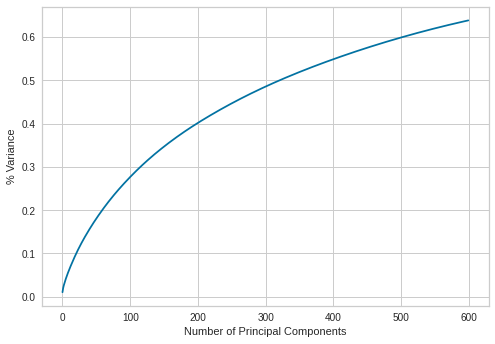

In [ ]:
plt.plot(sum_variance)
plt.ylabel('% Variance')
plt.xlabel("Number of Principal Components")
plt.show()

In [ ]:
print(above_50)

322


Part 4: Dimensionality Reduction and Classification

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(doc_features, labels, test_size=0.33)

In [ ]:
def knn_classifier(X_train, y_train, X_test):
  # instantiate learning model and fit data
  knn = KNeighborsClassifier(n_neighbors=k)    
  knn.fit(X_train, y_train)

  # predict the response
  pred = knn.predict(X_test)
  return pred

In [ ]:
import nltk.stem
english_stemmer = nltk.stem.SnowballStemmer('english')
class StemmedTfidfVectorizer(TfidfVectorizer):
   def build_analyzer(self):
     analyzer = super(StemmedTfidfVectorizer, self).build_analyzer()
     return lambda doc: (english_stemmer.stem(w) for w in analyzer(doc))

vectorizer = StemmedTfidfVectorizer(min_df=1, stop_words='english')
doc_features = vectorizer.fit_transform(documents).toarray()

In [ ]:
%%time
k=1
pred = knn_classifier(X_train, y_train, X_test)
acc = accuracy(pred, y_test)
pre = precision(pred, y_test)
rec = recall(pred, y_test)
f1= f1_score(pre, rec)
print("Accuracy: ",acc,"\n")
print("Precision: ",pre,"\n")
print("Recall: ",rec,"\n")
print("F1-Score: ",f1,"\n")

Accuracy:  0.9423844837421563 

Precision:  1.0 

Recall:  0.5627705627705628 

F1-Score:  0.7202216066481995 

CPU times: user 4.23 s, sys: 835 ms, total: 5.06 s
Wall time: 4.84 s


In [ ]:
#taken from lecture
def accuracy(pred, actual):
  correct_pred = (pred == actual)
  total_preds = actual.size
  return correct_pred.sum()/total_preds

In [ ]:
pca = PCA(n_components=500)
X_train_pc = pca.fit_transform(X_train)
X_test_pc = pca.transform(X_test)
dims = np.arange(1,902,100)
accu= []

for dim in dims:

  pred = []
  for test_feature in X_test_pc[:,0:dim]:
    dist = [np.linalg.norm((test_feature - train_feature)) for train_feature in X_train_pc[:,0:dim]]
    best_idx = np.argmin(dist)
    pred += [y_train[best_idx]]

  acc = (pred==y_test).sum()/y_test.size
  accu += [acc]
  print("With",dim,"PCs the accuracy is",acc)

With 1 PCs the accuracy is 0.8545350827153452
With 101 PCs the accuracy is 0.9606389047347405
With 201 PCs the accuracy is 0.9606389047347405
With 301 PCs the accuracy is 0.9560752994865944
With 401 PCs the accuracy is 0.9520821448944666
With 501 PCs the accuracy is 0.9509412435824302
With 601 PCs the accuracy is 0.9509412435824302
With 701 PCs the accuracy is 0.9509412435824302
With 801 PCs the accuracy is 0.9509412435824302
With 901 PCs the accuracy is 0.9509412435824302


In [ ]:
pca = PCA(n_components=202)
X_train_pc = pca.fit_transform(X_train)
X_test_pc = pca.transform(X_test)
dims = np.arange(51,202,25)
accur = []

for dim in dims:

  pred = []
  for test_feature in X_test_pc[:,0:dim]:
    dist = [np.linalg.norm((test_feature - train_feature)) for train_feature in X_train_pc[:,0:dim]]
    best_idx = np.argmin(dist)
    pred += [y_train[best_idx]]

  acc = (pred==y_test).sum()/y_test.size
  accur += [acc]
  print("With",dim,"PCs the accuracy is",acc)

With 51 PCs the accuracy is 0.9520821448944666
With 76 PCs the accuracy is 0.9577866514546491
With 101 PCs the accuracy is 0.9600684540787222
With 126 PCs the accuracy is 0.9646320593268682
With 151 PCs the accuracy is 0.9606389047347405
With 176 PCs the accuracy is 0.9600684540787222
With 201 PCs the accuracy is 0.9617798060467769


In [ ]:
%%time
#Split testing a training data
X_train, X_test, y_train, y_test = train_test_split(doc_features, labels, test_size=0.33)

#Fit PCA
pca = PCA(n_components=126)
X_train_pc = pca.fit_transform(X_train) #Avoiding leakage, only train PCA on training data!
X_test_pc = pca.transform(X_test)       #Transform the testing data based on the training data's PCA fit
# exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)
# print("Variance explained by",n_components,"PCA components:", exp_var_cumul[-1])

#1-NN Classifier
pred = []
for test_feature in X_test_pc:
  dist = [np.linalg.norm((test_feature - train_feature)) for train_feature in X_train_pc]
  best_idx = np.argmin(dist)
  pred += [y_train[best_idx]]

print(labels)
print(pred)
acc = accuracy(pred, y_test)
pre = precision(pred, y_test)
rec = recall(pred, y_test)
f1= f1_score(pre, rec)
print("Accuracy: ",acc,"\n")
print("Precision: ",pre,"\n")
print("Recall: ",rec,"\n")
print("F1-Score: ",f1,"\n")

['ham' 'ham' 'spam' ... 'ham' 'ham' 'ham']
['ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'spam', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham

Part 5: Spam Classification

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(doc_features, labels, test_size=0.33)

In [ ]:
#Stemming + TDIDF + Stopwords
import nltk.stem
english_stemmer = nltk.stem.SnowballStemmer('english')
class StemmedTfidfVectorizer(TfidfVectorizer):
   def build_analyzer(self):
     analyzer = super(StemmedTfidfVectorizer, self).build_analyzer()
     return lambda doc: (english_stemmer.stem(w) for w in analyzer(doc))

stemmed_tdidf_sw_vectorizer = StemmedTfidfVectorizer(min_df=1, stop_words='english')
doc_features_stemmed_tdidf_sw = stemmed_tdidf_sw_vectorizer.fit_transform(documents).toarray()

In [ ]:
#Stemming + TDIDF + Stopwords + Normalized
import nltk.stem
english_stemmer = nltk.stem.SnowballStemmer('english')
class StemmedTfidfVectorizer(TfidfVectorizer):
   def build_analyzer(self):
     analyzer = super(StemmedTfidfVectorizer, self).build_analyzer()
     return lambda doc: (english_stemmer.stem(w) for w in analyzer(doc))

stemmed_tdidf_sw_vectorizer_n = StemmedTfidfVectorizer(min_df=1, stop_words='english', norm='l2')
doc_features_stemmed_tdidf_sw_n = stemmed_tdidf_sw_vectorizer_n.fit_transform(documents).toarray()

In [ ]:
#Stemming + TDIDF
import nltk.stem
english_stemmer = nltk.stem.SnowballStemmer('english')
class StemmedTfidfVectorizer(TfidfVectorizer):
   def build_analyzer(self):
     analyzer = super(StemmedTfidfVectorizer, self).build_analyzer()
     return lambda doc: (english_stemmer.stem(w) for w in analyzer(doc))

stemmed_tdidf_vectorizer = StemmedTfidfVectorizer(min_df=1)
doc_features_stemmed_tdidf= stemmed_tdidf_vectorizer.fit_transform(documents).toarray()

In [ ]:
#Stemming + TDIDF + Normalized
import nltk.stem
english_stemmer = nltk.stem.SnowballStemmer('english')
class StemmedTfidfVectorizer(TfidfVectorizer):
   def build_analyzer(self):
     analyzer = super(StemmedTfidfVectorizer, self).build_analyzer()
     return lambda doc: (english_stemmer.stem(w) for w in analyzer(doc))

stemmed_tdidf_vectorizer_n = StemmedTfidfVectorizer(min_df=1, norm='l2')
doc_features_stemmed_tdidf_n = stemmed_tdidf_vectorizer_n.fit_transform(documents).toarray()

In [ ]:
#TDIDF + Stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer_sw = TfidfVectorizer(min_df=1, stop_words='english')
doc_features_tfidf_sw = tfidf_vectorizer_sw.fit_transform(documents).toarray()

In [ ]:
#TDIDF + Stopwords + Normalized
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer_sw_n = TfidfVectorizer(min_df=1, stop_words='english', norm='l2')
doc_features_tfidf_sw_n = tfidf_vectorizer_sw_n.fit_transform(documents).toarray()

In [ ]:
#TDIDF
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(min_df=1)
doc_features_tfidf = tfidf_vectorizer.fit_transform(documents).toarray()

In [ ]:
#TDIDF + Normalized
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer_n = TfidfVectorizer(min_df=1)
doc_features_tfidf_n = tfidf_vectorizer_n.fit_transform(documents).toarray()

In [ ]:
#Count 
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer(min_df = 1)
doc_features_count = count_vectorizer.fit_transform(documents).toarray()

In [ ]:
def normalize(X):
  x_mean = X.mean(axis=0)
  X -= X.mean(axis=0) # subtract the mean for each feature
  x_std = X.std(axis=0)
  X /= X.std(axis=0)  # divide each feature by its standard deviation
  return (x_mean, x_std, X)

In [ ]:
#Count + Stopwords
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer_sw = CountVectorizer()
doc_features_count_sw = count_vectorizer_sw.fit_transform(documents).toarray()

In [ ]:
import nltk
nltk.download('punkt')
def tokenize(text):
    tokens = nltk.word_tokenize(text)
    stems = []
    for item in tokens:
        stems.append(english_stemmer.stem(item))
    return stems

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
#Stemming + Count + Stopwords
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer_stemmed_sw = CountVectorizer(tokenizer=tokenize)
doc_features_count_stemmed_sw = count_vectorizer_stemmed_sw.fit_transform(documents).toarray()

In [ ]:
#Count + Normalized
from sklearn import preprocessing
doc_features_count_n = preprocessing.normalize(doc_features_count)

In [ ]:
#Count + StopWords + Normalized
doc_features_count_sw_n = preprocessing.normalize(doc_features_count_sw)

In [ ]:
#Count + StopWords + Stemming + Normalized
doc_features_count_stemmed_sw_n = preprocessing.normalize(doc_features_count_stemmed_sw)

In [ ]:
vectorizers = [doc_features_stemmed_tdidf_sw, doc_features_stemmed_tdidf_sw_n, doc_features_stemmed_tdidf, doc_features_stemmed_tdidf_n, doc_features_tfidf_sw, doc_features_tfidf_sw_n, doc_features_tfidf, doc_features_tfidf_n, doc_features_count, doc_features_count_sw, doc_features_count_stemmed_sw, doc_features_count_n, doc_features_count_sw_n, doc_features_count_stemmed_sw_n]

In [ ]:
print(len(vectorizers))

14


In [ ]:
for i in range(len(vectorizers)):
  X_train, X_test, y_train, y_test = train_test_split(vectorizers[i], labels, test_size=0.33)
  pca = PCA(n_components=500)
  #Find best number of principal components
  X_train_pc = pca.fit_transform(X_train)
  X_test_pc = pca.transform(X_test)
  dims = np.arange(1,202,25)
  best_pca = -1
  best_acc = 0
  best_pre = 0
  best_re = 0
  best_f1 = 0
  for dim in dims:

    pred = []
    for test_feature in X_test_pc[:,0:dim]:
      dist = [np.linalg.norm((test_feature - train_feature)) for train_feature in X_train_pc[:,0:dim]]
      best_idx = np.argmin(dist)
      pred += [y_train[best_idx]]

    acc = accuracy(pred, y_test)
    pre = precision(pred, y_test)
    re = recall(pred, y_test)
    f1 = f1_score(pre, re)
    if f1 > best_f1 or (f1 - best_f1 >= 0.0000001 and acc > best_acc):
      best_pca = dim
      best_acc = acc
      best_pre = pre
      best_re = re
      best_f1 = f1
  print("Vectorizer ", i, " with ", best_pca, " PCs:")
  print("Accuracy: ",best_acc,"\n")
  print("Precision: ",best_pre,"\n")
  print("Recall: ",best_re,"\n")
  print("F1-Score: ",best_f1,"\n")

    #print("With",dim,"PCs the accuracy is",acc)

Vectorizer  0  with  26  PCs:
Accuracy:  0.9669138619509412 

Precision:  0.8836206896551724 

Recall:  0.8686440677966102 

F1-Score:  0.8760683760683761 

Vectorizer  1  with  26  PCs:
Accuracy:  0.968625213918996 

Precision:  0.8625592417061612 

Recall:  0.875 

F1-Score:  0.8687350835322196 

Vectorizer  2  with  26  PCs:
Accuracy:  0.9652025099828865 

Precision:  0.8924302788844621 

Recall:  0.8682170542635659 

F1-Score:  0.8801571709233792 

Vectorizer  3  with  26  PCs:
Accuracy:  0.9629207073588134 

Precision:  0.8405172413793104 

Recall:  0.874439461883408 

F1-Score:  0.8571428571428571 

Vectorizer  4  with  51  PCs:
Accuracy:  0.9703365658870508 

Precision:  0.893719806763285 

Recall:  0.8604651162790697 

F1-Score:  0.8767772511848341 

Vectorizer  5  with  26  PCs:
Accuracy:  0.9634911580148318 

Precision:  0.8170212765957446 

Recall:  0.9014084507042254 

F1-Score:  0.8571428571428571 

Vectorizer  6  with  26  PCs:
Accuracy:  0.9589275527666857 

Precision:  